# Plotting with matplotlib, more numpy

We will use [matplotlib](https://matplotlib.org/) to

* make scatter plots
* plot of (training) curves
* show images.

There are many good tutorials for these on the internet, so we keep it short here with annotated full examples.


In [12]:
# Setup and Imports. Run this cell.

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import random
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

The import corresponding to matplotlib is `from matplotlib import pyplot as plt` and it will be used as `plt.some_function()`.


We start by **recreating the visualization of the NXOR function** introduced in the numpy colab.

### Exercise 1: Generate Data for NXOR (1 point)

Write a function `get_data(num_examples)` that returns two numpy arrays

* `inputs` of shape  `num_examples x 2` with points selected uniformly from the $[-1, 1]^2$ domain.
* `labels` of shape `num_examples` with the associated output of `NXOR`.

In [7]:
def get_data(num_examples):
    
    ### Your code here ###
    
    return np.zeros((num_examples, 2)), np.zeros((num_examples))

The function should return someting like this:

```
> get_data(10)

(array([[ 0.47932292, -0.91411724],
        [ 0.82688125, -0.66568372],
        [-0.6282968 , -0.46057625],
        [ 0.43004041, -0.51095059],
        [-0.59233934,  0.73722183],
        [ 0.90849177, -0.53833632],
        [-0.53569035, -0.09351865],
        [-0.08000096, -0.06517878],
        [ 0.76379435,  0.43496156],
        [-0.28867115,  0.34382088]]),
 array([-1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.]))
 
 ```

In [18]:
inputs, labels = get_data(100)

## Scatter Plot

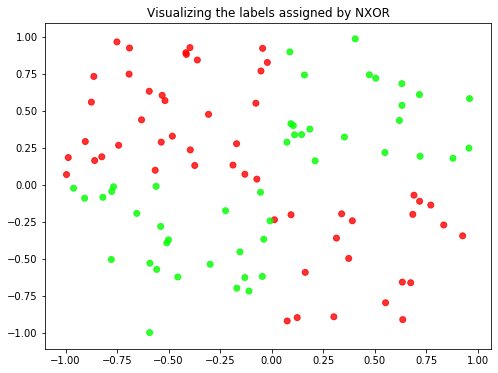

In [19]:
MARKER_COLORS = np.array([
    [1.0, 0.0, 0.0],  # red for -1 
    [0.0, 1.0, 0.0],  # green for +1
])
# Convert the labels to colors.
class_idx = (labels + 1 / 2.0).astype(np.int)

# Visualize the data.
plt.figure(figsize=(8, 6)) # or just plt.figure()
plt.title('Visualizing the labels assigned by NXOR')
plt.scatter(x=inputs[:, 0], y=inputs[:, 1], c=MARKER_COLORS[class_idx], alpha=0.8)
plt.savefig('nxor_data.png', bbox_inches='tight')  # Can save it, or
plt.show()  # More often just display it.

### Exercise 2: Make markers class dependent (1 point)

Create a scatter plot like above, but use an 'o' marker for negative examples and 'x' marker for positive ones.

*Note:* it is not possible to pass markers like colors to `scatter`, instead you will have to call `scatter` twice, independently for each class. In this case you will also have to look up how to provide labels for data plotted.

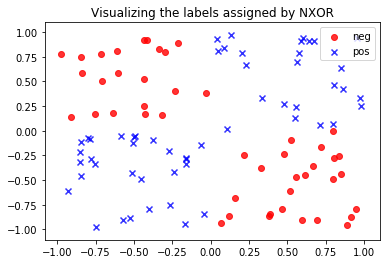

In [11]:
### Your code here ###

# It should look like this: 

## Plotting Curves

Curves assign y-values to a sequence of x-values. Here you will see how to plot two different curves onto the same plot, so they can be compared.

First, we create some dummy data:

In [20]:
# Create [0, ..., 1] evenly spaced with 50 elements:
xs = np.linspace(start=0, stop=1, num=50)

y_real = np.sin(xs*2*np.pi)

# Pretend there is some noise at each timesteps.
err = np.random.normal(loc=0.0, scale=0.08, size=y_real.shape)
err = np.cumsum(err)  # Which adds up over time.
y_measured = y_real + err  # Yielding the final measured signal.

### Exercise 3: plot two curves (1 point)

Plot the two curves defined above. 

You can try modifying:
* colors
* data labels,
* plot title
* adding a legend,
* axes labels,
* setting axes limits.


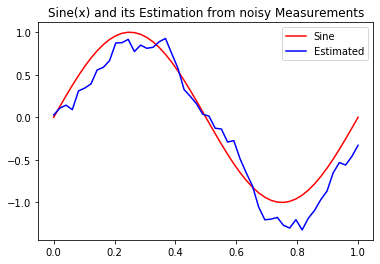

In [22]:
### Your code here ###

# It should look like this: 

## Displaying images with matplotlib

`matplotlib` can display an array as an image. This will come in handy for displaying images our neural networks drew.



We don't have an image in array form here, so instead we will visualize the pdf of a bivariate normal distribution. The details of how this image is created (the next two cells) are not important.

#### Creating an image array

In [14]:
normal = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
# We can get the density of a number of points like so:
normal.pdf(np.array([[0, 0], [-10, 7], [1, 0.9]]))

array([1.59154943e-01, 7.02880071e-34, 6.43848407e-02])

In [15]:
# Define the grid of points over which the pdf is evaluated.
RANGE = 3
GRANULARITY = 30

x = np.linspace(-RANGE, RANGE, GRANULARITY)
y = np.linspace(-RANGE, RANGE, GRANULARITY)
XX, YY = np.meshgrid(x, y)

# Now (XX[i,j], YY[i,j]) give the x,y coordinates of points in the grid,
# create an array such that XY[i, j] = [x, y].
XY = np.stack([XX, YY], axis=-1)

probabilities = normal.pdf(XY)

#### Show the image

`probabilities` is now a 2D array with values corresponding to densities. We can display it in grayscale.



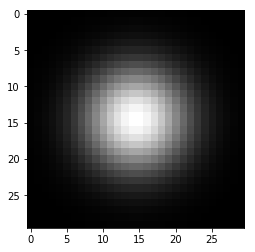

In [16]:
plt.gray()
plt.imshow(probabilities)
plt.show()

We can remove the axes and labels from the display for a cleaner look. Also note the difference in setting grayscale mode in the next cell.

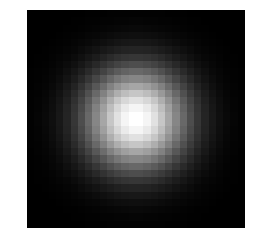

In [17]:
plt.axis('off')
plt.imshow(probabilities, cmap='gray')
plt.show()

### Exercise 4: make and display a coloured image (1 point)

Display the image in red.

Helpful facts:

* `imshow()` takes arrays of size `n x m x 3` and interprets the last axis as an rgb channel.
* The largest value in `probabilities` was around `0.15`,  so unless you rescale your array the image will be dark.

The grayscale image plotting automatically rescaled the entries in the `probabilities` array!

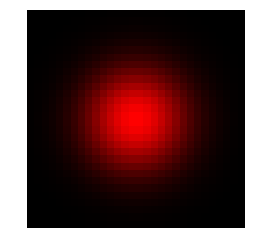

In [18]:
### Your code here ###

# It should look like this:

### Showing a Grid of Images

We define a helper function to turn a batch of images into a grid. You do not need to care about its implementation, but check its documentation as you will use the same function later in this lab and other labs (hopefully :) ).

In [24]:
def gallery(array, ncols=10, rescale=True):
    """Take a batch of images and arrange them in a grid.
  
    Args:
        array: of shape batch_size x height x width x 3. The final x3 in the shape
            is optional.
        ncols: number of columns to have in the grid
        rescale: if true (default), increases the intensity of the images.
    
    Returns:
        A numpy array which contains the batch of images arranged into
        a grid.
    """
    if rescale:
        array = (array + 1.) / 2
    nindex, height, width = array.shape[:3]

    nrows = nindex//ncols
    assert nindex == nrows*ncols

    # want result.shape = (height*nrows, width*ncols, intensity?)
    abstract_grid_shape = [nrows, ncols, height, width]
    image_grid_shape = [height*nrows, width*ncols]
    if len(array.shape) == 4:
        intensity = array.shape[3]
        abstract_grid_shape.append(intensity)
        image_grid_shape.append(intensity)
 
    result = (array.reshape(*abstract_grid_shape)
                .swapaxes(1,2)
                .reshape(*image_grid_shape))
    return result

In order to showcase the use of this function, we make an array corresponding to a batch of images. For simplicity, our batch will just be 8 copies of the red image above.

**Before continuing let `red_image` denote the red image you created in the previous exercise.**

In [25]:
### Your code here ###
red_image = red_image  # Replace the second `red_image` by your red image

In [26]:
batch_of_images = np.stack([red_image] * 9, axis=0)
batch_of_images.shape

(9, 30, 30, 3)

### Use the `gallery` helper function

To display the `batch_of_images` we just created in a 3x3 grid.

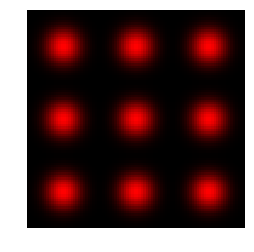

In [27]:
## Your code here ##

### Final Notes

`matplotlib` has many different types of plots and is really flexible. You can make any plot you can imagine with it. $^{TM}$.